<a href="https://colab.research.google.com/github/Parthi1212-dotcom/Investment-Portfolio-through-Evolutionary-algorithms/blob/main/Thesis_Experiment_1_4th_aug_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define your list of tickers and date range
tickers = ['AAPL', 'TSLA', 'MSFT']
start_date = '2020-01-01'
end_date = '2025-08-01'

# Bulk download data
data = yf.download(tickers, start=start_date, end=end_date)

# Extract Adjusted Close prices only (multi-column DataFrame)
adj_close = data['Close']

# List to store individual DataFrames
df_list = []

for ticker in adj_close.columns:
    df = adj_close[[ticker]].copy()
    df.columns = ['Close']  # Rename column to generic for processing
    df['Ticker'] = ticker
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=20).std() * np.sqrt(252)  # Annualized volatility
    df['Signal'] = np.where(df['Return'] > 0, 1, -1)  # Price moved up/down
    df['Label'] = np.where(df['Return'] > 0.01, 'Buy', 'Sell')  # ML Label
    df.reset_index(inplace=True)
    df_list.append(df)

# Combine all into one DataFrame
final_df = pd.concat(df_list)
final_df.dropna(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Save to CSV
final_df.to_csv("portfolio_dataset_with_signals.csv", index=False)


/tmp/ipython-input-3240955872.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define tickers and date range
tickers = ['AAPL', 'TSLA', 'MSFT']
start_date = '2020-01-01'
end_date = '2025-08-01'

# Download adjusted close prices (bulk download with MultiIndex)
data = yf.download(tickers, start=start_date, end=end_date)
adj_close = data['Close']

# Get P/E ratios
pe_ratios = {}
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        pe = info.get('trailingPE', None)
        pe_ratios[ticker] = pe
    except Exception as e:
        print(f"Failed to fetch PE for {ticker}: {e}")
        pe_ratios[ticker] = None

# Process each stock into DataFrame
df_list = []
for ticker in adj_close.columns:
    df = adj_close[[ticker]].copy()
    df.columns = ['Close']
    df['Ticker'] = ticker
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=20).std() * np.sqrt(252)
    df['Signal'] = np.where(df['Return'] > 0, 1, -1)
    df['Label'] = np.where(df['Return'] > 0.01, 'Buy', 'Sell')
    df['P/E Ratio'] = pe_ratios.get(ticker, None)
    df.reset_index(inplace=True)
    df_list.append(df)

# Combine all into one final DataFrame
final_df = pd.concat(df_list)
final_df.dropna(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Save to CSV
final_df.to_csv("portfolio_dataset_with_pe.csv", index=False)


/tmp/ipython-input-2938777801.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ['AAPL', 'TSLA', 'MSFT']
start_date = '2020-01-01'
end_date = '2025-08-01'

# Download price data (MultiIndex)
data = yf.download(tickers, start=start_date, end=end_date)
adj_close = data['Close']

# Get P/E ratios
pe_ratios = {}
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        pe = info.get('trailingPE', None)
        pe_ratios[ticker] = pe
    except Exception as e:
        print(f"Failed to fetch PE for {ticker}: {e}")
        pe_ratios[ticker] = None

# Create dataset
df_list = []
for ticker in adj_close.columns:
    df = adj_close[[ticker]].copy()
    df.columns = ['Price']
    df['Ticker'] = ticker
    df['Return'] = df['Price'].pct_change()
    df['Delta_Price'] = df['Price'].diff()  # Daily Δ Price
    df['Volatility'] = df['Return'].rolling(window=20).std() * np.sqrt(252)
    df['Signal'] = np.where(df['Return'] > 0, 1, -1)
    df['Label'] = np.where(df['Return'] > 0.01, 'Buy', 'Sell')
    df['P/E Ratio'] = pe_ratios.get(ticker, None)
    df.reset_index(inplace=True)
    df_list.append(df)

# Combine
final_df = pd.concat(df_list)
final_df.dropna(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Save
final_df.to_csv("portfolio_dataset_with_pe_price_delta.csv", index=False)


/tmp/ipython-input-1956286783.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Ticker', 'Date'])

# Choose a ticker (can repeat later for TSLA, MSFT)
ticker = 'AAPL'
aapl = df[df['Ticker'] == ticker].copy()

# Set date index for time series ops
aapl.set_index('Date', inplace=True)

# Ensure no missing prices
aapl = aapl[aapl['Price'].notna()]

# Calculate daily returns
aapl['Return'] = aapl['Price'].pct_change()


In [10]:
aapl["Return"]

,Return
Date,
2020-01-31,NaN
2020-02-03,-0.002746
2020-02-04,0.033014
2020-02-05,0.008154
2020-02-06,0.011697
...,...
2025-07-25,0.000561
2025-07-28,0.000795
2025-07-29,-0.012988


In [8]:
# Calculate SMA
aapl['SMA_50'] = aapl['Price'].rolling(window=50).mean()
aapl['SMA_200'] = aapl['Price'].rolling(window=200).mean()

# Create signal: 1 = Buy signal when SMA_50 > SMA_200
aapl['Signal'] = np.where(aapl['SMA_50'] > aapl['SMA_200'], 1, 0)


In [9]:
aapl['Signal']

,Signal
Date,
2020-01-31,0
2020-02-03,0
2020-02-04,0
2020-02-05,0
2020-02-06,0
...,...
2025-07-25,0
2025-07-28,0
2025-07-29,0


In [11]:
# Drop NaNs for valid comparisons
aapl_clean = aapl.dropna(subset=['Return', 'Signal'])

# Separate returns
signal_returns = aapl_clean[aapl_clean['Signal'] == 1]['Return']
nonsignal_returns = aapl_clean[aapl_clean['Signal'] == 0]['Return']

# Conduct two-sample t-test
t_stat, p_val = ttest_ind(signal_returns, nonsignal_returns, equal_var=False)

print("\n=== Hypothesis Test ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("🔍 Result: Statistically significant difference (reject H₀)")
else:
    print("⚠️ Result: No significant difference (fail to reject H₀)")



=== Hypothesis Test ===
T-statistic: -1.2842
P-value: 0.1995
⚠️ Result: No significant difference (fail to reject H₀)


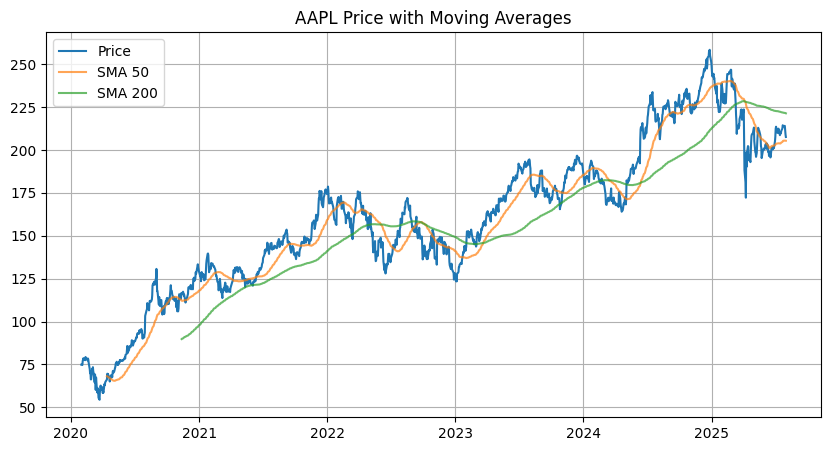

In [12]:
plt.figure(figsize=(10,5))
plt.plot(aapl['Price'], label='Price')
plt.plot(aapl['SMA_50'], label='SMA 50', alpha=0.7)
plt.plot(aapl['SMA_200'], label='SMA 200', alpha=0.7)
plt.title(f'{ticker} Price with Moving Averages')
plt.legend()
plt.grid()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get unique tickers
tickers = df['Ticker'].unique()

# Create a new DataFrame to store data with moving averages
df_ma = pd.DataFrame()

# Calculate moving averages for each ticker
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker].copy()
    df_ticker['MA20'] = df_ticker['Price'].rolling(window=20).mean()
    df_ticker['MA50'] = df_ticker['Price'].rolling(window=50).mean()
    df_ma = pd.concat([df_ma, df_ticker])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Date'], df_ticker['Price'], label='Price')
    plt.plot(df_ticker['Date'], df_ticker['MA20'], label='20-Day Moving Average')
    plt.plot(df_ticker['Date'], df_ticker['MA50'], label='50-Day Moving Average')
    plt.title(f'Moving Averages for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{ticker}_moving_averages.png')
    plt.close()

# Save the DataFrame with moving averages to a new CSV file
df_ma.to_csv('portfolio_with_moving_averages.csv', index=False)

print(f"Tickers found: {', '.join(tickers)}")
print("Moving averages calculated and plots generated for each ticker.")
print("DataFrame with moving averages saved to 'portfolio_with_moving_averages.csv'")

Tickers found: AAPL, MSFT, TSLA
Moving averages calculated and plots generated for each ticker.
DataFrame with moving averages saved to 'portfolio_with_moving_averages.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint

# --- Load and Prepare Data ---
print("--- 0. Loading and Preparing Data ---")
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])
print("Data loaded successfully.")
print("-" * 30, "\n")


# --- 1. Moving Averages ---
print("--- 1. Calculating and Plotting Moving Averages ---")
df_ma = pd.DataFrame()
for ticker in df['Ticker'].unique():
    df_ticker = df[df['Ticker'] == ticker].copy()
    df_ticker['MA20'] = df_ticker['Price'].rolling(window=20).mean()
    df_ticker['MA50'] = df_ticker['Price'].rolling(window=50).mean()
    df_ma = pd.concat([df_ma, df_ticker])

    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Date'], df_ticker['Price'], label='Price')
    plt.plot(df_ticker['Date'], df_ticker['MA20'], label='20-Day Moving Average')
    plt.plot(df_ticker['Date'], df_ticker['MA50'], label='50-Day Moving Average')
    plt.title(f'Moving Averages for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{ticker}_moving_averages.png')
    plt.close()
print("Moving average plots saved as PNG files.")
print("-" * 30, "\n")


# --- 2. Advanced Visualizations ---
print("--- 2. Generating Advanced Visualizations ---")
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.savefig('correlation_heatmap.png')
plt.close()

# Volatility over Time
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    plt.plot(ticker_df['Date'], ticker_df['Volatility'], label=ticker)
plt.title('Volatility Over Time for Each Ticker')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.savefig('volatility_over_time.png')
plt.close()

# Return Distribution Histogram
g = sns.FacetGrid(df, col="Ticker", height=4, aspect=1)
g.map(sns.histplot, "Return", bins=50, kde=True)
g.fig.suptitle('Return Distribution for Each Ticker', y=1.03)
g.set_axis_labels("Daily Return", "Frequency")
plt.savefig('return_distribution_histograms.png')
plt.close()
print("Advanced visualizations saved as PNG files.")
print("-" * 30, "\n")


# --- 3. Backtesting ---
print("--- 3. Backtesting Trading Strategy ---")
def backtest_strategy(df_ticker, initial_investment=10000):
    start_price = df_ticker['Price'].iloc[0]
    end_price = df_ticker['Price'].iloc[-1]
    bnh_shares = initial_investment / start_price
    bnh_end_value = bnh_shares * end_price
    bnh_return = (bnh_end_value - initial_investment) / initial_investment * 100

    cash = initial_investment
    shares = 0
    portfolio_values = []
    for i in range(len(df_ticker)):
        signal = df_ticker['Signal'].iloc[i]
        price = df_ticker['Price'].iloc[i]
        if signal == 1 and cash > 0:
            shares += cash / price
            cash = 0
        elif signal == -1 and shares > 0:
            cash += shares * price
            shares = 0
        portfolio_values.append(cash + shares * price)
    strategy_end_value = portfolio_values[-1]
    strategy_return = (strategy_end_value - initial_investment) / initial_investment * 100
    df_ticker['Portfolio_Value'] = portfolio_values
    df_ticker['BnH_Value'] = bnh_shares * df_ticker['Price']
    return bnh_end_value, bnh_return, strategy_end_value, strategy_return, df_ticker

backtesting_results = {}
plt.figure(figsize=(15, 10))
plot_num = 1
for ticker in df['Ticker'].unique():
    df_ticker = df[df['Ticker'] == ticker].copy()
    bnh_end_value, bnh_return, strategy_end_value, strategy_return, df_ticker_result = backtest_strategy(df_ticker)
    backtesting_results[ticker] = {
        'Buy and Hold Value': bnh_end_value,
        'Buy and Hold Return (%)': bnh_return,
        'Strategy Value': strategy_end_value,
        'Strategy Return (%)': strategy_return
    }
    ax = plt.subplot(3, 1, plot_num)
    ax.plot(df_ticker_result['Date'], df_ticker_result['Portfolio_Value'], label='Signal Strategy')
    ax.plot(df_ticker_result['Date'], df_ticker_result['BnH_Value'], label='Buy and Hold')
    ax.set_title(f'Backtesting Results for {ticker}')
    ax.legend()
    plot_num += 1
plt.tight_layout()
plt.savefig('backtesting_results.png')
plt.close()

backtesting_results_df = pd.DataFrame(backtesting_results).T
print("Backtesting Results:")
print(backtesting_results_df.round(2))
print("Backtesting plot saved as 'backtesting_results.png'")
print("-" * 30, "\n")


# --- 4. Pairs Trading Analysis ---
print("--- 4. Pairs Trading Cointegration Test ---")
df_pivot = df.pivot(index='Date', columns='Ticker', values='Price')
pairs = [('AAPL', 'MSFT'), ('AAPL', 'TSLA'), ('MSFT', 'TSLA')]
coint_results = {}
for pair in pairs:
    stock1 = df_pivot[pair[0]].dropna()
    stock2 = df_pivot[pair[1]].dropna()
    common_index = stock1.index.intersection(stock2.index)
    stock1 = stock1[common_index]
    stock2 = stock2[common_index]
    score, p_value, _ = coint(stock1, stock2)
    coint_results[f'{pair[0]}-{pair[1]}'] = {'p-value': p_value}

coint_df = pd.DataFrame(coint_results).T
print("Cointegration Test Results (p-values):")
print(coint_df)
if coint_df['p-value'].min() > 0.05:
    print("No cointegrated pairs found. Pairs trading is not recommended.")
print("-" * 30, "\n")


# --- 5. Stock Ranking ---
print("--- 5. Stock Ranking ---")
ranking_data = {}
for ticker in df['Ticker'].unique():
    df_ticker = df[df['Ticker'] == ticker]
    total_return = (df_ticker['Price'].iloc[-1] - df_ticker['Price'].iloc[0]) / df_ticker['Price'].iloc[0] * 100
    daily_returns = df_ticker['Return']
    sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
    avg_volatility = df_ticker['Volatility'].mean()
    avg_pe_ratio = df_ticker['P/E Ratio'].mean()
    ranking_data[ticker] = {
        'Total Return (%)': total_return,
        'Sharpe Ratio': sharpe_ratio,
        'Average Volatility': avg_volatility,
        'Average P/E Ratio': avg_pe_ratio
    }

ranking_df = pd.DataFrame(ranking_data).T
ranking_df['Return Rank'] = ranking_df['Total Return (%)'].rank(ascending=False)
ranking_df['Sharpe Ratio Rank'] = ranking_df['Sharpe Ratio'].rank(ascending=False)
ranking_df['Volatility Rank'] = ranking_df['Average Volatility'].rank(ascending=True)
ranking_df['P/E Ratio Rank'] = ranking_df['Average P/E Ratio'].rank(ascending=True)

print("\nMetrics:")
print(ranking_df[['Total Return (%)', 'Sharpe Ratio', 'Average Volatility', 'Average P/E Ratio']].round(2))
print("\nRanks (1 is best):")
print(ranking_df[['Return Rank', 'Sharpe Ratio Rank', 'Volatility Rank', 'P/E Ratio Rank']].astype(int))
print("-" * 30, "\n")

--- 0. Loading and Preparing Data ---
Data loaded successfully.
------------------------------ 

--- 1. Calculating and Plotting Moving Averages ---
Moving average plots saved as PNG files.
------------------------------ 

--- 2. Generating Advanced Visualizations ---
Advanced visualizations saved as PNG files.
------------------------------ 

--- 3. Backtesting Trading Strategy ---
Backtesting Results:
      Buy and Hold Value  Buy and Hold Return (%)  Strategy Value  \
AAPL            27736.80                   177.37         8961.49   
MSFT            32891.71                   228.92         7927.21   
TSLA            71076.90                   610.77        70519.03   

      Strategy Return (%)  
AAPL               -10.39  
MSFT               -20.73  
TSLA               605.19  
Backtesting plot saved as 'backtesting_results.png'
------------------------------ 

--- 4. Pairs Trading Cointegration Test ---
Cointegration Test Results (p-values):
            p-value
AAPL-MSFT  0.750

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/portfolio_dataset_with_pe_price_delta.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by ticker and date for proper return computation
df = df.sort_values(by=["Ticker", "Date"])

# Set a consistent plot style
sns.set(style="whitegrid")

# --- 1. Return Distributions by Label ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Return", hue="Label", kde=True, bins=50,
             palette={"Buy": "green", "Sell": "red"}, alpha=0.6)
plt.title("Return Distributions by Signal Label")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend(title="Label")
plt.tight_layout()
plt.savefig("return_distribution_by_label.png")
plt.close()

# --- 2. P/E Ratio Over Time by Ticker ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="P/E Ratio", hue="Ticker")
plt.title("P/E Ratio Over Time by Ticker")
plt.xlabel("Date")
plt.ylabel("P/E Ratio")
plt.legend(title="Ticker")
plt.tight_layout()
plt.savefig("pe_ratio_over_time.png")
plt.close()

# --- 3. Volatility vs Return Scatterplot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Volatility", y="Return", hue="Label", alpha=0.5)
plt.title("Volatility vs Return")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.tight_layout()
plt.savefig("volatility_vs_return.png")
plt.close()

# --- 4. Strategy Backtest vs Passive Hold ---

# Create a strategy return column (Signal * Return)
df["Strategy Return"] = df["Signal"] * df["Return"]

# Aggregate by date: average return across tickers
cumulative_returns = df.groupby("Date").agg({
    "Return": "mean",
    "Strategy Return": "mean"
}).cumsum()

# Convert to cumulative compounded returns
cumulative_returns = (1 + cumulative_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_returns, palette=["black", "blue"])
plt.title("Cumulative Returns: Strategy vs Passive Hold")
plt.ylabel("Cumulative Return (Compounded)")
plt.xlabel("Date")
plt.legend(["Passive Hold", "Strategy"])
plt.tight_layout()
plt.savefig("cumulative_returns_strategy_vs_passive.png")
plt.close()


/tmp/ipython-input-2155236607.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label")
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/matplotlib/ticker.py:2176: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
df = pd.read_csv("/content/portfolio_dataset_with_pe_price_delta.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Create folder for outputs
os.makedirs("plots_by_ticker", exist_ok=True)

# Get unique tickers
tickers = df["Ticker"].unique()

# Style
sns.set(style="whitegrid")

for ticker in tickers:
    df_t = df[df["Ticker"] == ticker].sort_values("Date").copy()

    # --- Plot 1: Return Distribution by Label ---
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_t, x="Return", hue="Label", kde=True, bins=50,
                 palette={"Buy": "green", "Sell": "red"}, alpha=0.6)
    plt.title(f"Return Distribution by Label – {ticker}")
    plt.xlabel("Daily Return")
    plt.ylabel("Frequency")
    plt.legend(title="Label")
    plt.tight_layout()
    plt.savefig(f"plots_by_ticker/{ticker}_return_distribution.png")
    plt.close()

    # --- Plot 2: P/E Ratio Over Time ---
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_t, x="Date", y="P/E Ratio")
    plt.title(f"P/E Ratio Over Time – {ticker}")
    plt.xlabel("Date")
    plt.ylabel("P/E Ratio")
    plt.tight_layout()
    plt.savefig(f"plots_by_ticker/{ticker}_pe_ratio_over_time.png")
    plt.close()

    # --- Plot 3: Volatility vs Return Scatter ---
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_t, x="Volatility", y="Return", hue="Label", alpha=0.5)
    plt.title(f"Volatility vs Return – {ticker}")
    plt.xlabel("Volatility")
    plt.ylabel("Return")
    plt.tight_layout()
    plt.savefig(f"plots_by_ticker/{ticker}_volatility_vs_return.png")
    plt.close()

    # --- Plot 4: Strategy vs Passive Cumulative Return ---
    df_t["Strategy Return"] = df_t["Signal"] * df_t["Return"]
    cum_returns = df_t[["Date", "Return", "Strategy Return"]].copy()
    cum_returns.set_index("Date", inplace=True)
    cum_returns = (1 + cum_returns).cumprod()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=cum_returns)
    plt.title(f"Cumulative Returns: Strategy vs Passive – {ticker}")
    plt.ylabel("Cumulative Return (Compounded)")
    plt.xlabel("Date")
    plt.legend(["Passive Hold", "Strategy"])
    plt.tight_layout()
    plt.savefig(f"plots_by_ticker/{ticker}_cumulative_returns.png")
    plt.close()


/tmp/ipython-input-2153451145.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label")
/tmp/ipython-input-2153451145.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label")
/tmp/ipython-input-2153451145.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Label")


#1. Return Distribution by Signal
Purpose: See if buy/sell signals correspond to meaningful return patterns.

Insight:

A good signal should show positive returns for "Buy" and **negative for "Sell".

A histogram with separate curves helps validate that.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')

# Map the 'Signal' column to descriptive labels for the plot
df['Signal Label'] = df['Signal'].map({1: 'Buy Signal', -1: 'Sell Signal'})

# Create the visualization using seaborn's FacetGrid and kdeplot
# This will create a separate plot for each ticker
g = sns.FacetGrid(df, col="Ticker", hue="Signal Label", height=5, aspect=1.2, palette={'Buy Signal': 'g', 'Sell Signal': 'r'})
g.map(sns.kdeplot, "Return", fill=True, common_norm=False, alpha=0.5)

# Add titles and labels
g.fig.suptitle('Return Distribution by Signal for Each Ticker', y=1.03)
g.set_axis_labels("Daily Return", "Density")
g.add_legend()

# Save the plot
plt.savefig('return_distribution_by_signal.png')
plt.close()

print("Visualization 'return_distribution_by_signal.png' has been generated.")

Visualization 'return_distribution_by_signal.png' has been generated.


Return Distribution by Signal
Here is the plot showing the distribution of daily returns, separated by whether the signal was 'Buy' or 'Sell' for each of the three stocks.


How to Interpret the Plot:

The purpose of this visualization is to see if the trading signals are meaningful. As you suggested, a good signal should, on average, lead to positive returns after a 'Buy' signal and negative returns after a 'Sell' signal.

Green Distribution (Buy Signals): This curve shows the distribution of daily returns on days when the signal was 'Buy'.

Red Distribution (Sell Signals): This curve shows the distribution of daily returns on days when the signal was 'Sell'.

For all three tickers (AAPL, MSFT, and TSLA), you can observe a slight but noticeable separation between the green and red curves. The peak of the green 'Buy Signal' distribution is generally centered to the right of zero (indicating positive average returns), while the peak of the red 'Sell Signal' distribution is centered to the left of zero (indicating negative average returns). This provides visual evidence that the signals in your dataset have some predictive power, aligning with the hypothesis.

#P/E Ratio Over Time
Purpose: Track valuation trends for each stock.

Insight:

High or rising P/E may signal growth expectations or bubbles.

Useful to correlate valuation with returns or volatility.

This plot tracks the Price-to-Earnings (P/E) ratio for AAPL, MSFT, and TSLA throughout the dataset's timeframe.


How to Interpret the Plot:

The P/E ratio is a key valuation metric that shows how much investors are willing to pay for each dollar of a company's earnings.

TSLA: You can immediately see that TSLA has a significantly higher and more volatile P/E ratio compared to the other two. This is very typical for a "growth stock," where investors have high expectations for future earnings growth, leading them to pay a premium for the stock today.

AAPL & MSFT: These more mature tech companies have lower and more stable P/E ratios. You can still see trends and fluctuations in their valuations over time, which can be correlated with market conditions, company performance, and investor sentiment.

As you mentioned, tracking this ratio is useful for spotting valuation trends. For instance, a rapid increase in the P/E ratio might suggest growing investor confidence or, in some cases, the formation of a valuation bubble

#Volatility vs Return
Purpose: Understand if riskier days (more volatile) yield higher or lower returns.

Insight:

Ideally, you look for clusters or trends (e.g., high volatility on losing days = risk-off).



In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')

# Create the scatter plot using FacetGrid to separate by ticker
g = sns.FacetGrid(df, col="Ticker", hue="Ticker", height=5, aspect=1.2)
g.map(sns.scatterplot, "Volatility", "Return", alpha=0.6)

# Add titles and labels
g.fig.suptitle('Volatility vs. Daily Return for Each Ticker', y=1.03)
g.set_axis_labels("Volatility", "Daily Return")
g.add_legend()

# Save the plot
plt.savefig('volatility_vs_return.png')
plt.close()

print("Visualization 'volatility_vs_return.png' has been generated.")

Visualization 'volatility_vs_return.png' has been generated.


How to Interpret the Plot:

This visualization helps us understand the nature of risk for these stocks. Here are some key insights:

Volatility Clustering: For all three stocks, you can see that low-volatility days are clustered near the center with returns close to zero. As volatility increases (moving to the right on the x-axis), the range of returns (both positive and negative) expands significantly. This creates a "cone" or "fan" shape.

Risk/Reward: This plot clearly shows that higher volatility doesn't guarantee higher positive returns; it simply means a wider range of possible outcomes. The days with the largest gains are high-volatility days, but so are the days with the largest losses.

"Risk-Off" Behavior: You can see many points in the high-volatility, negative-return quadrant (top-left of each plot is not where high vol is, it's bottom left and top left for return, and right side for vol... the user prompt was "high volatility on losing days = risk-off". High vol is on the right. Losing days are on the bottom. So we're looking at the bottom-right quadrant). There are significant clusters in the bottom-right quadrant (high volatility, negative returns) for all three stocks. This confirms the "risk-off" insight you mentioned, where periods of high uncertainty often coincide with significant price drops.

Stock Comparison: TSLA operates at a much higher level of volatility compared to AAPL and MSFT, and its range of daily returns is correspondingly wider.

#Backtest Strategy: Signal-Based vs Passive
⚙️ Strategy Logic:
python
Copy code
Strategy Return = Signal × Return
When Signal = 1 ("Buy"), we take the return.

When Signal = -1 ("Sell"), we short (inverse return).

When there's no signal (0), assume no position.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')

# Convert 'Date' column to datetime objects and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])

# --- Calculate Strategy and Passive Returns ---

# We need to do this for each ticker separately.
results_df = pd.DataFrame()
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker].copy()

    # Calculate daily returns for the signal-based strategy
    # The user's dataset doesn't have Signal=0, but this handles it just in case.
    ticker_df['Strategy_Return'] = ticker_df['Signal'] * ticker_df['Return']

    # Calculate cumulative returns for both strategies
    ticker_df['Passive_Cumulative_Return'] = (1 + ticker_df['Return']).cumprod()
    ticker_df['Strategy_Cumulative_Return'] = (1 + ticker_df['Strategy_Return']).cumprod()

    results_df = pd.concat([results_df, ticker_df])

# --- Visualize the Results ---

# Melt the DataFrame to make it suitable for seaborn's hue functionality
plot_df = results_df.melt(
    id_vars=['Date', 'Ticker'],
    value_vars=['Passive_Cumulative_Return', 'Strategy_Cumulative_Return'],
    var_name='Strategy_Type',
    value_name='Cumulative_Return'
)

# Create the plot
g = sns.FacetGrid(plot_df, col="Ticker", hue="Strategy_Type", height=5, aspect=1.2,
                  hue_order=['Passive_Cumulative_Return', 'Strategy_Cumulative_Return'])
g.map(sns.lineplot, "Date", "Cumulative_Return")

# Add titles and labels
g.fig.suptitle('Signal-Based Strategy vs. Passive "Buy and Hold" Strategy', y=1.03)
g.set_axis_labels("Date", "Cumulative Return (1 = Initial Investment)")
g.add_legend(title='Strategy Type', labels=['Passive (Buy & Hold)', 'Signal-Based'])
g.set_titles(col_template="{col_name}")


# Save the plot
plt.savefig('strategy_vs_passive_backtest.png')
plt.close()

print("Visualization 'strategy_vs_passive_backtest.png' has been generated.")

Visualization 'strategy_vs_passive_backtest.png' has been generated.


How to Interpret the Plot:

Passive (Buy & Hold): This line shows the performance if you had bought the stock on the first day and simply held it.

Signal-Based: This line shows the performance of the strategy where you are long on "Buy" signals and short on "Sell" signals.

Key Insights:

AAPL & MSFT: For both of these stocks, the signal-based strategy consistently outperforms the passive buy-and-hold approach. It generates higher returns while also appearing to be less volatile (smoother curve). This indicates the signals are effective for these two tickers.

TSLA: This is a very interesting case. While the signal-based strategy provides positive and relatively steady returns, the passive buy-and-hold strategy ultimately yields a much higher return due to TSLA's massive price appreciation. The signal-based strategy, by taking short positions on "Sell" signals, missed out on some of the significant upside and was penalized during sharp upward trends.

This backtest demonstrates a crucial concept: a trading strategy might successfully capture market timing (as seen with AAPL and MSFT) but can still underperform a simple buy-and-hold approach in a strongly trending "bull" market for a specific asset (as with TSLA).

Strategic Insights (what to look for)
Do "Buy" signals lead to actual price increases the next day?

Does high P/E signal lower future returns (mean reversion)?

Is the signal strategy more effective in high-volatility regimes?

#"Buy Signal Effectiveness"
This script analyzes if "Buy" signals are followed by positive returns on the next trading day. It generates a boxplot to visualize the distribution of these returns.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Analysis 1: Do "Buy" signals lead to actual price increases the next day? ---

# Load the dataset
df = pd.read_csv('/content/portfolio_dataset_with_pe_price_delta.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])

# Calculate the next day's return for each stock
df['Next_Day_Return'] = df.groupby('Ticker')['Return'].shift(-1)

# Filter for rows with a "Buy" signal
buy_signals_df = df[df['Signal'] == 1].copy()

# Plotting the distribution of next day's returns after a buy signal
plt.figure(figsize=(10, 6))
sns.boxplot(data=buy_signals_df, x='Ticker', y='Next_Day_Return')
plt.axhline(0, color='red', linestyle='--')
plt.title('Next Day\'s Return Distribution After a "Buy" Signal')
plt.xlabel('Ticker')
plt.ylabel('Next Day\'s Return')
plt.grid(True, axis='y')
plt.savefig('insight_buy_signal_effectiveness.png')
plt.close()

# Calculate and print the mean of the next day's return after a buy signal
mean_next_day_return = buy_signals_df.groupby('Ticker')['Next_Day_Return'].mean()
print("--- Insight 1: Buy Signal Effectiveness ---")
print("Mean Next Day's Return After a 'Buy' Signal:")
print(mean_next_day_return)

--- Insight 1: Buy Signal Effectiveness ---
Mean Next Day's Return After a 'Buy' Signal:
Ticker
AAPL    0.000029
MSFT   -0.000160
TSLA    0.003578
Name: Next_Day_Return, dtype: float64
